In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


**Step 1: Importing Required Libraries**

We need to install Pandas, NumPy, Matplotlib and Seaborn libraries in python to proceed further.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

**Step 2: Reading Dataset**

Lets read the dataset using pandas.

In [3]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
print(df.head)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075  

**Step 3: Analyzing the Data**

1. df.shape(): This function is used to understand the number of rows (observations) and columns (features) in the dataset. This gives an overview of the dataset's size and structure.

In [4]:
df.shape

(1143, 13)

2. df.info(): This function helps us to understand the dataset by showing the number of records in each column, type of data, whether any values are missing and how much memory the dataset uses.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


3. df.describe().T: This method gives a statistical summary of the DataFrame (Transpose) showing values like count, mean, standard deviation, minimum and quartiles for each numerical column. It helps in summarizing the central tendency and spread of the data.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


4. df.columns.tolist(): This converts the column names of the DataFrame into a Python list making it easy to access and manipulate the column names.

In [7]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

**Step 4 : Checking Missing Values**

df.isnull().sum(): This checks for missing values in each column and returns the total number of null values per column helping us to identify any gaps in our data.

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

**Step 5 : Checking for the duplicate values**

df.nunique(): This function tells us how many unique values exist in each column which provides insight into the variety of data in each feature.

In [9]:
df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

**Step 6: Univariate Analysis**

In Univariate analysis plotting the right charts can help us to better understand the data making the data visualization so important

1. Bar Plot for evaluating the count of the wine with its quality rate.

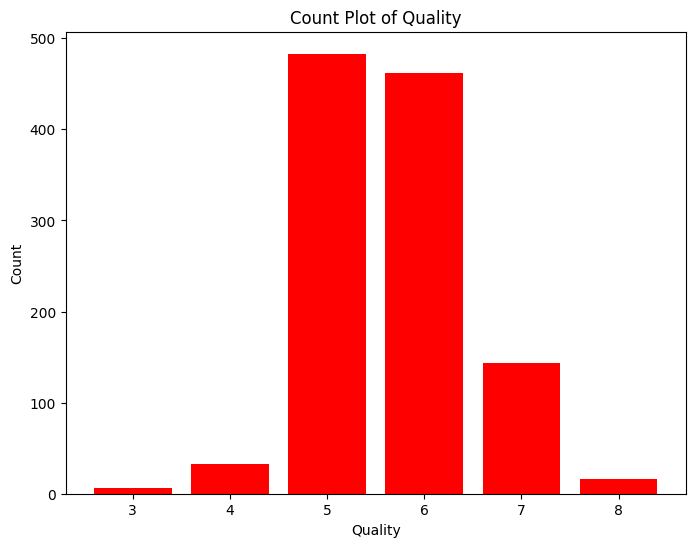

In [10]:
quality_counts = df['quality'].value_counts()
plt.figure(figsize = (8, 6))
plt.bar(quality_counts.index, quality_counts, color = 'red')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

2. Kernel density plot for understanding variance in the dataset

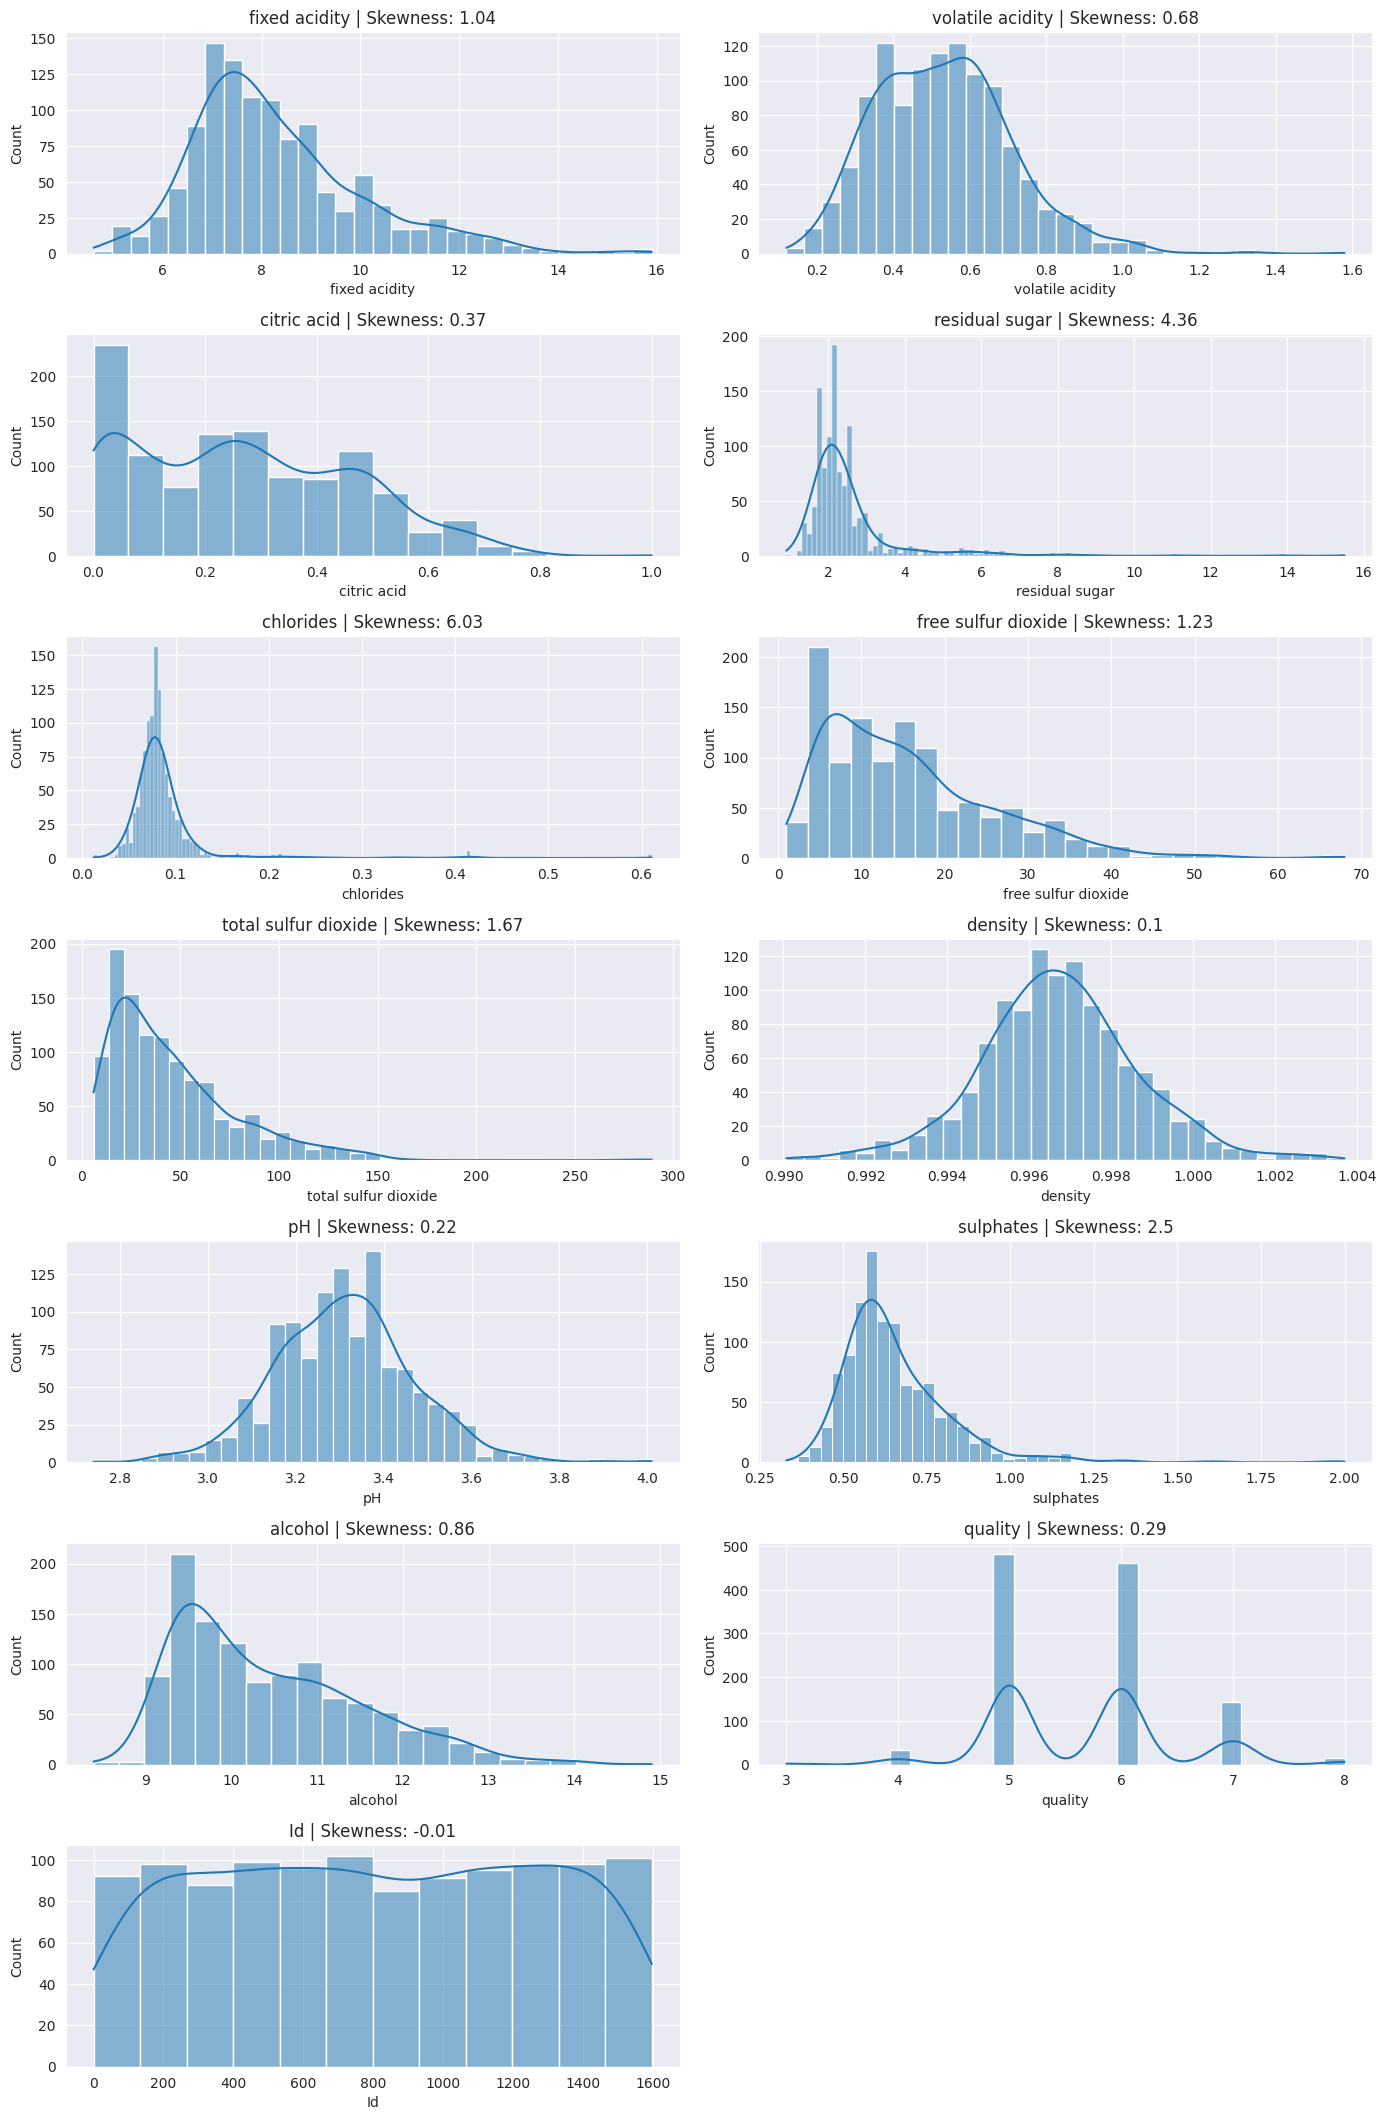

In [11]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include = ["int64", "float64"]).columns
plt.figure(figsize = (14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde = True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

The features in the dataset with a skewness of 0 shows a symmetrical distribution. If the skewness is 1 or above it suggests a positively skewed (right-skewed) distribution. In a right-skewed distribution the tail extends more to the right which shows the presence of extremely high values.

3. Swarm Plot for showing the outlier in the data

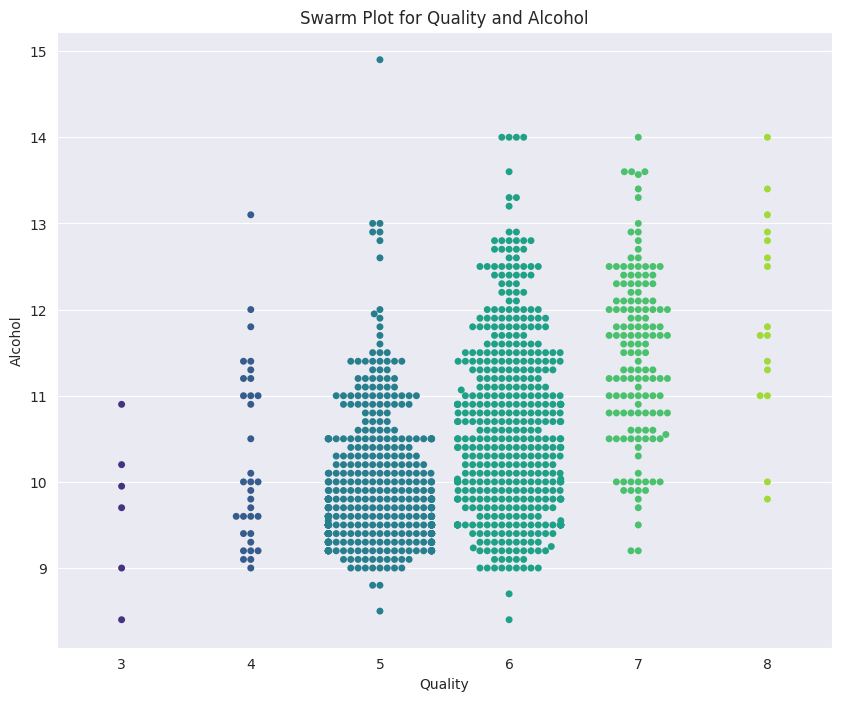

In [12]:
plt.figure(figsize = (10, 8))

sns.swarmplot(x = "quality", y = "alcohol", data = df, palette = 'viridis')
plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

This graph shows the swarm plot for the 'Quality' and 'Alcohol' columns. The higher point density in certain areas shows where most of the data points are concentrated. Points that are isolated and far from these clusters represent outliers highlighting uneven values in the dataset.

**Step 7: Bivariate Analysis**

In bivariate analysis two variables are analyzed together to identify patterns, dependencies or interactions between them. This method helps in understanding how changes in one variable might affect another.

Let's visualize these relationships by plotting various plot for the data which will show how the variables interact with each other across multiple dimensions.

1. Pair Plot for showing the distribution of the individual variables

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

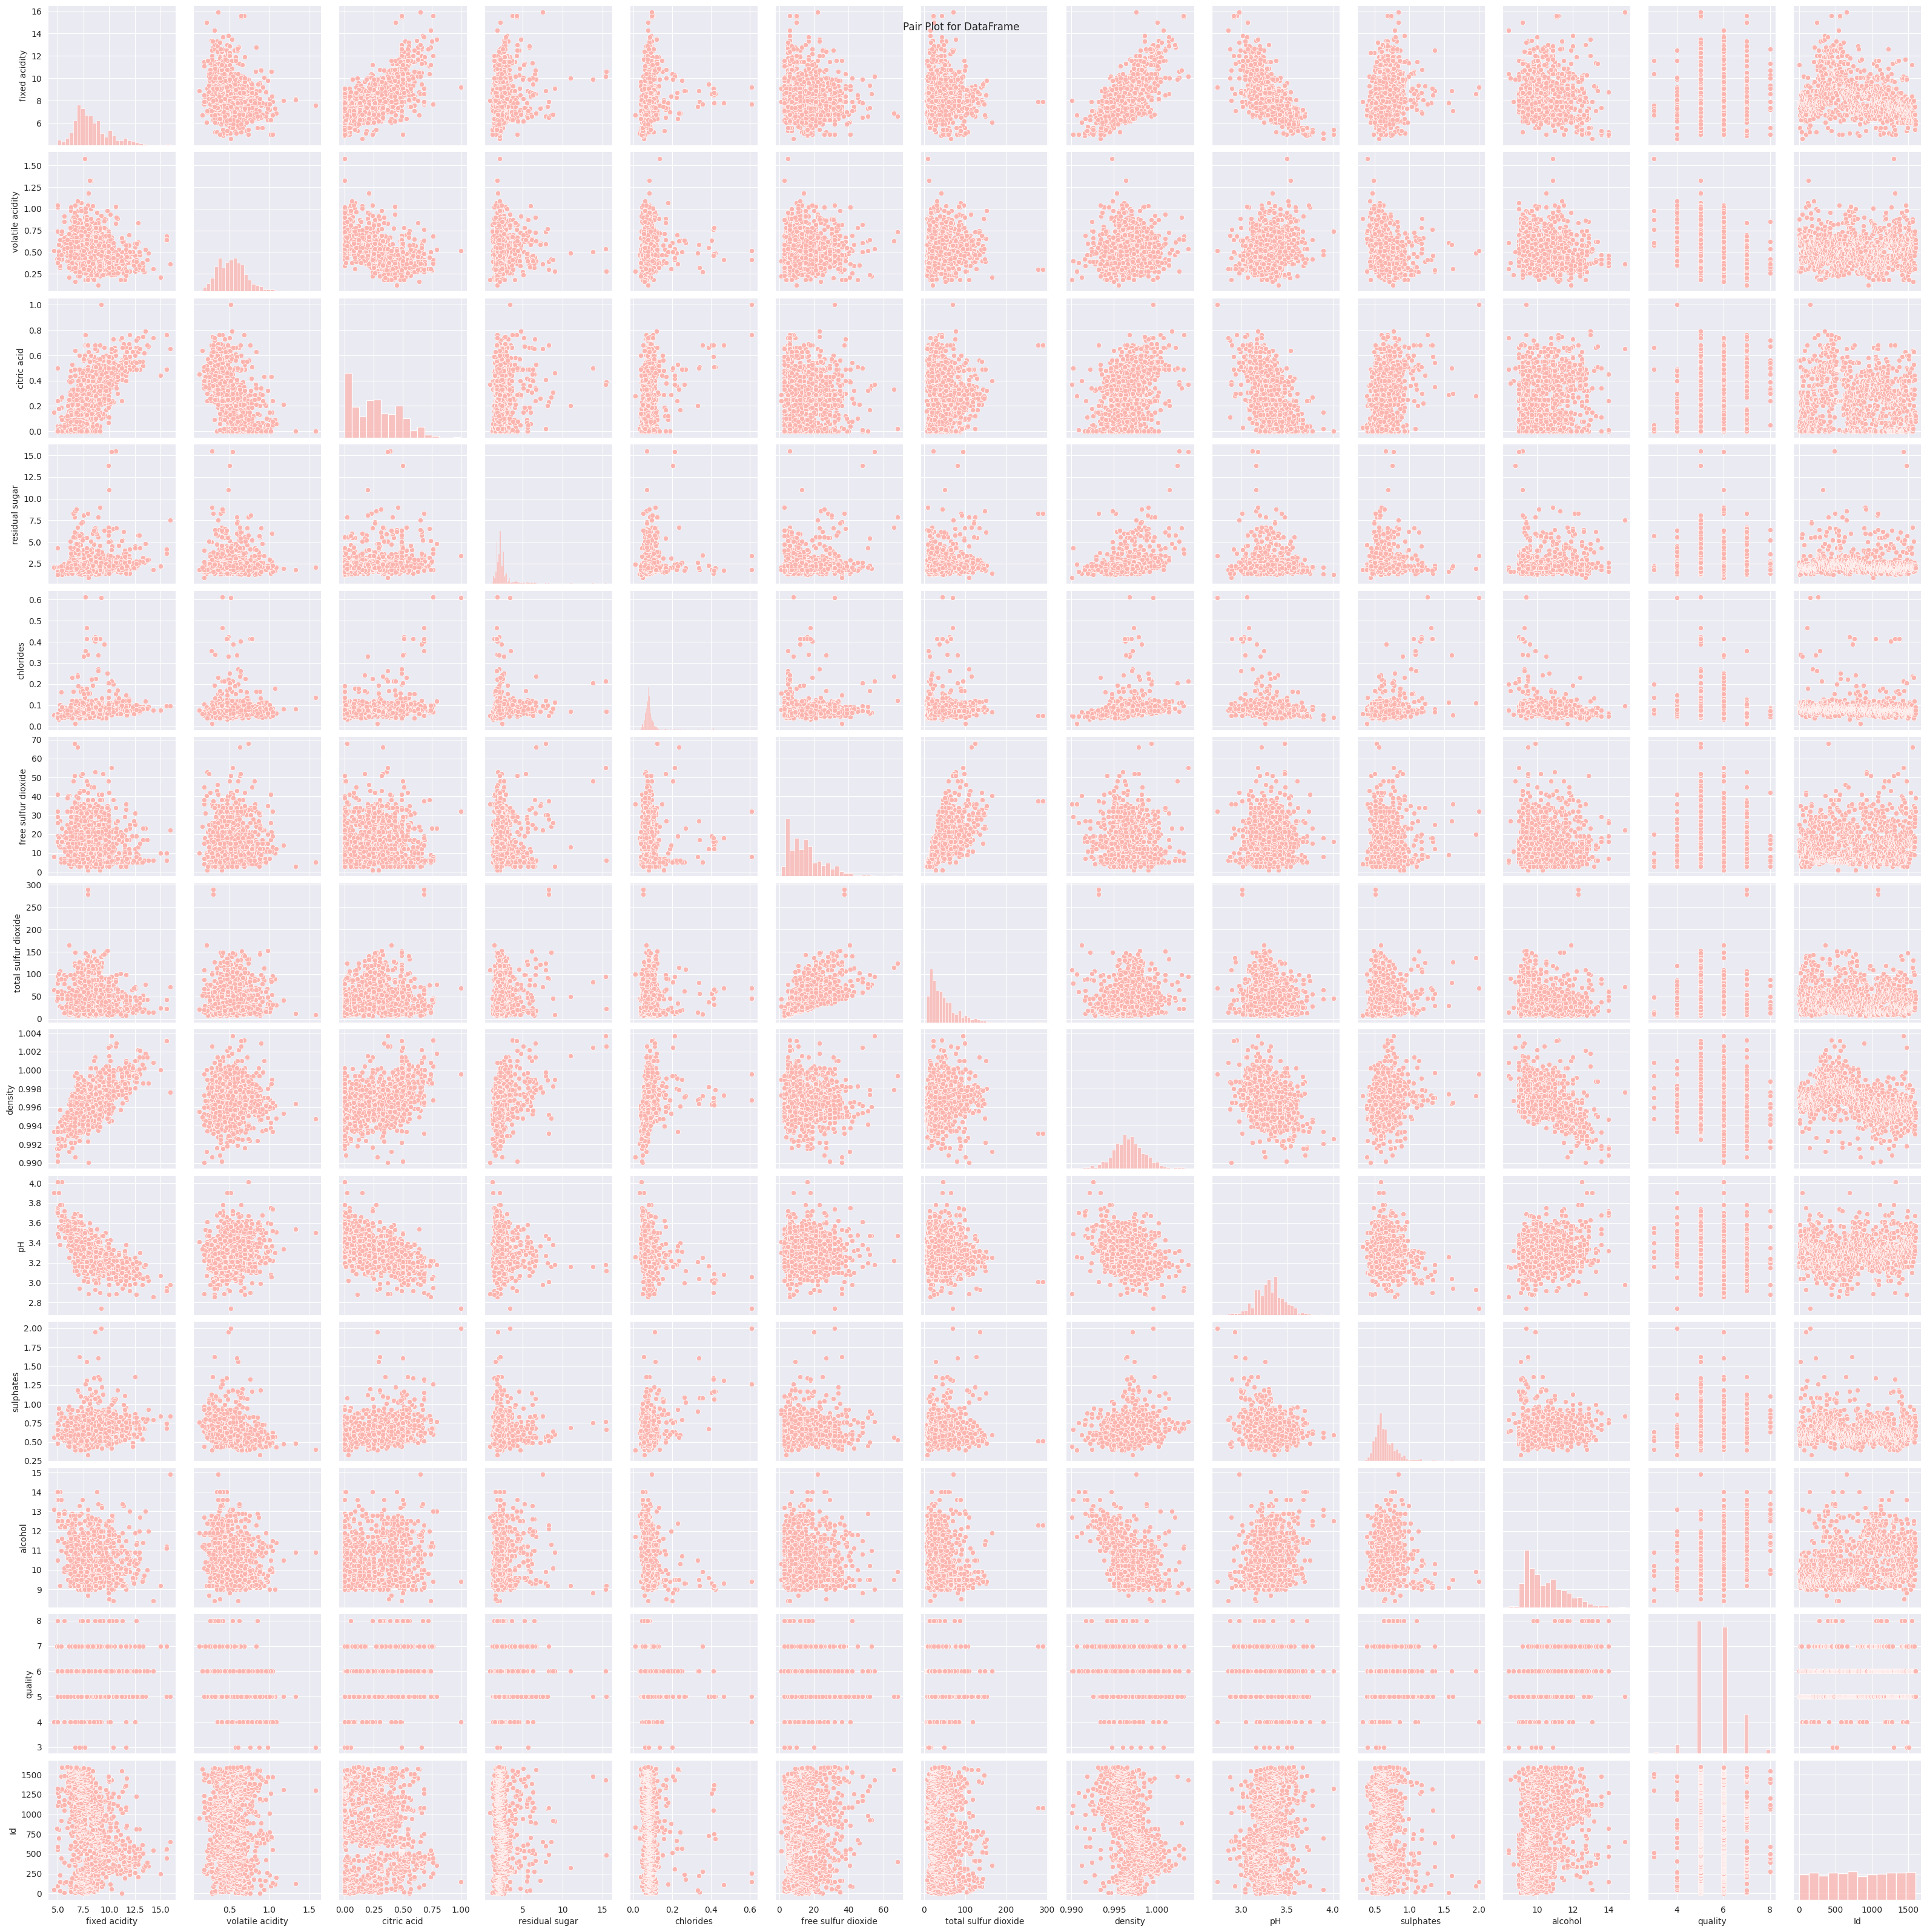

In [13]:
sns.set_palette("Pastel1")

plt.figure(figsize = (10, 6))

sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show

1. If the plot is diagonal , histograms of kernel density plots shows the distribution of the individual variables.
2. If the scatter plot is in the lower triangle, it displays the relationship between the pairs of the variables.
3. If the scatter plots above and below the diagonal are mirror images indicating symmetry.
4. If the histogram plots are more centered, it represents the locations of peaks.
5. Skewness is found by observing whether the histogram is symmetrical or skewed to the left or right.

2. Violin Plot for examining the relationship between alcohol and Quality.

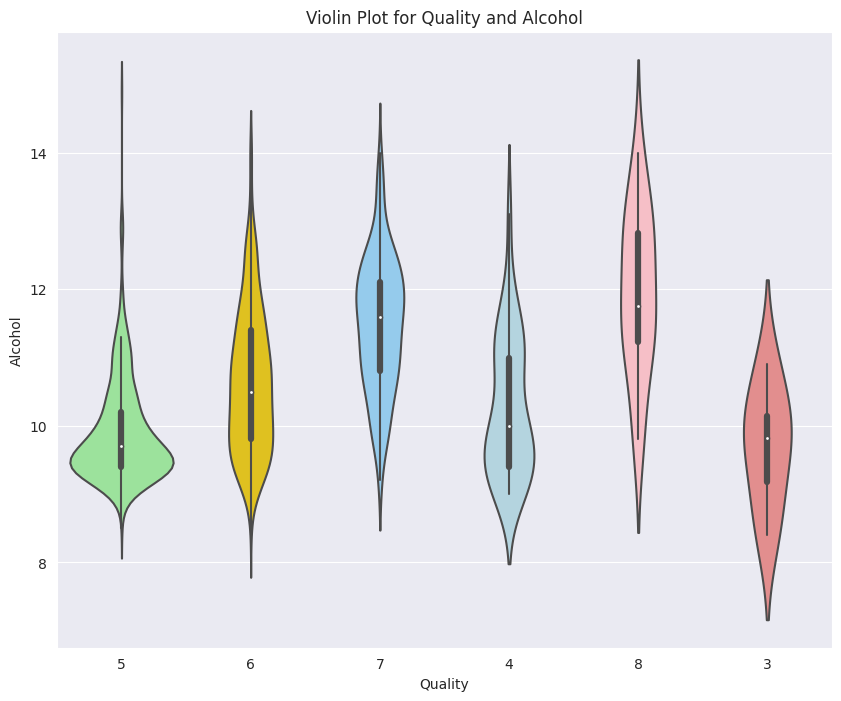

In [14]:
df['quality'] = df['quality'].astype(str)

plt.figure(figsize = (10,8))

sns.violinplot(x ="quality", y = "alcohol", data = df, palette = {'3': 'lightcoral', '4': 'lightblue', '5': 'lightgreen', '6': 'gold', '7': 'lightskyblue', '8': 'lightpink'}, alpha = 0.7)

plt.title('Violin Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

1. If the width is wider, it shows higher density suggesting more data points.
2. Symmetrical plot shows a balanced distribution.
3. Peak or bulge in the violin plot represents most common value in distribution.
4. Longer tails shows great variability.
5. Median line is the middle line inside the violin plot. It helps in understanding central tendencies.

3. Box Plot for examining the relationship between alcohol and Quality

<Axes: xlabel='quality', ylabel='alcohol'>

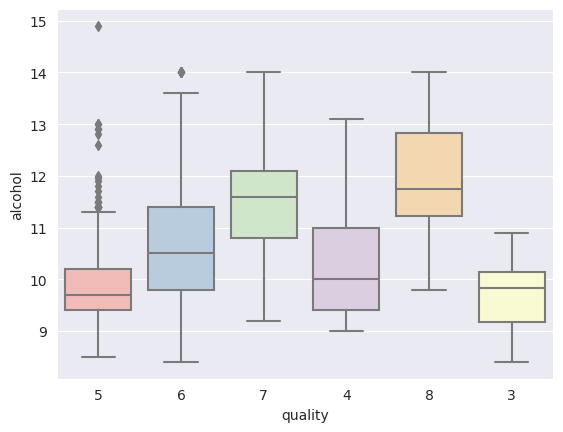

In [15]:
sns.boxplot(x = 'quality', y = 'alcohol', data = df)

Box represents the IQR i.e longer the box, greater the variability.

1. Median line in the box shows central tendency.
2. Whiskers extend from box to the smallest and largest values within a specified range.
3. Individual points beyond the whiskers represents outliers.
4. A compact box shows low variability while a stretched box shows higher variability.

**Step 8: Multivariate Analysis**

It involves finding the interactions between three or more variables in a dataset at the same time. This approach focuses to identify complex patterns, relationships and interactions which provides understanding of how multiple variables collectively behave and influence each other.

Here, we are going to show the multivariate analysis using a correlation matrix plot.

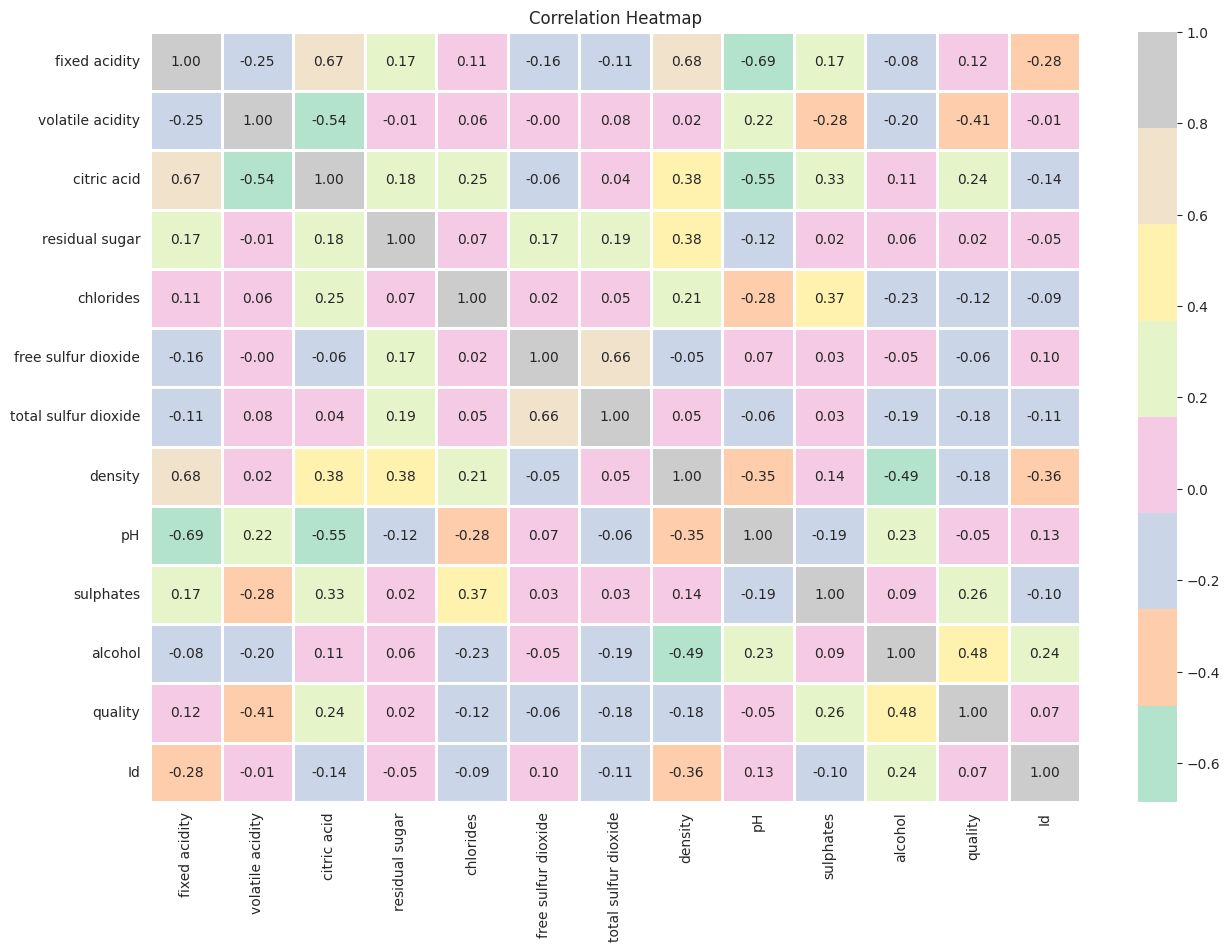

In [16]:
plt.figure(figsize = (15,10))

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'Pastel2', linewidths = 2)

plt.title('Correlation Heatmap')
plt.show()

Values close to +1 shows strong positive correlation, -1 shows a strong negative correlation and 0 suggests no linear correlation.

1. Darker colors signify strong correlation, while light colors represents weaker correlations.
2. Positive correlation variable move in same directions. As one increases, the other also increases.
3. Negative correlation variable move in opposite directions. An increase in one variable is associated with a decrease in the other.

With these insights from the EDA, we are now ready to undertsand the data and explore more advanced modeling techniques.